In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random

In [2]:
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train ,y_train  = train['features'] ,train['labels']
X_validation ,y_validation  = valid['features'] ,valid['labels']
X_test ,y_test  = test['features'] ,test['labels']

In [4]:
X_train.shape

(34799, 32, 32, 3)

In [5]:
y_train.shape

(34799,)

# PERFORM IMAGES VISUALIZATION

30

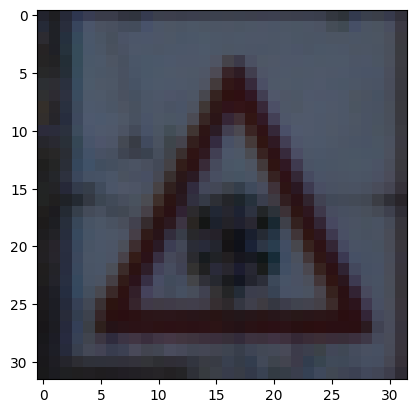

In [6]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])
y_train[i]

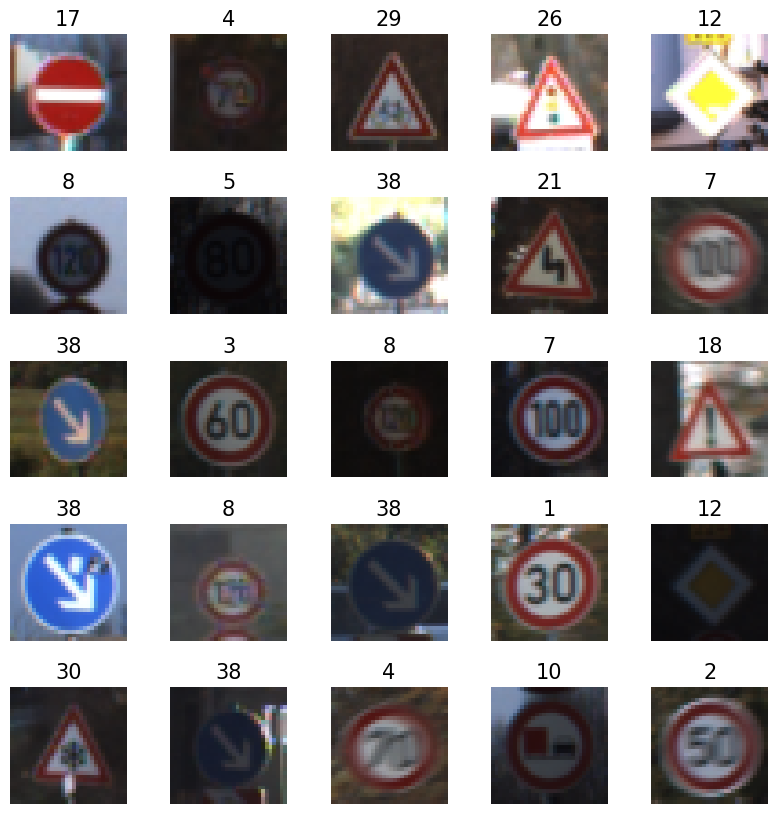

In [7]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0, W_grid * L_grid):
    
    # Select a random number
    index =np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index], fontsize= 15)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)
        

# CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [8]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [9]:
X_train_gray = np.sum(X_train/3, axis =3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis =3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis =3, keepdims=True)

In [10]:
X_train_gray.shape


(34799, 32, 32, 1)

In [11]:
X_train_gray_norm = (X_train_gray - 128 )/128
X_test_gray_norm = (X_test_gray - 128 )/128
X_validation_gray_norm = (X_validation_gray - 128 )/128

In [12]:
X_train_gray_norm

array([[[[-0.83072917],
         [-0.82291667],
         [-0.8203125 ],
         ...,
         [ 0.765625  ],
         [ 0.79427083],
         [ 0.83072917]],

        [[-0.82552083],
         [-0.8125    ],
         [-0.80989583],
         ...,
         [ 0.26041667],
         [ 0.33333333],
         [ 0.37239583]],

        [[-0.8203125 ],
         [-0.8125    ],
         [-0.8125    ],
         ...,
         [-0.46614583],
         [-0.43489583],
         [-0.41666667]],

        ...,

        [[-0.76302083],
         [-0.75      ],
         [-0.75520833],
         ...,
         [-0.7421875 ],
         [-0.74739583],
         [-0.73697917]],

        [[-0.7578125 ],
         [-0.7421875 ],
         [-0.73697917],
         ...,
         [-0.73697917],
         [-0.74479167],
         [-0.74479167]],

        [[-0.76302083],
         [-0.75260417],
         [-0.75      ],
         ...,
         [-0.72916667],
         [-0.73177083],
         [-0.7265625 ]]],


       [[[-0.69010417],


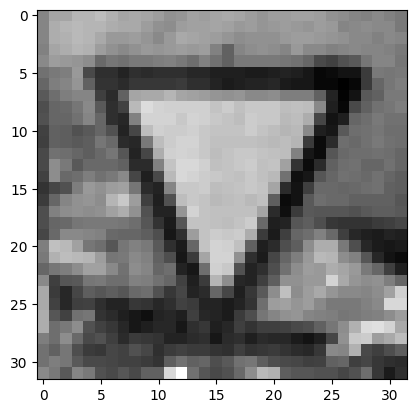

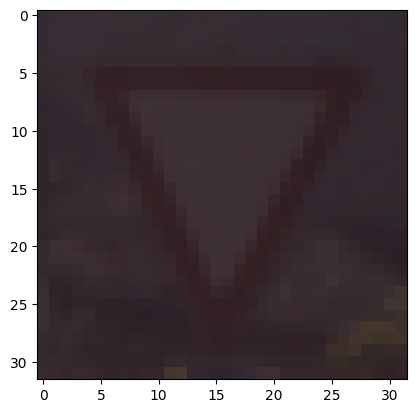

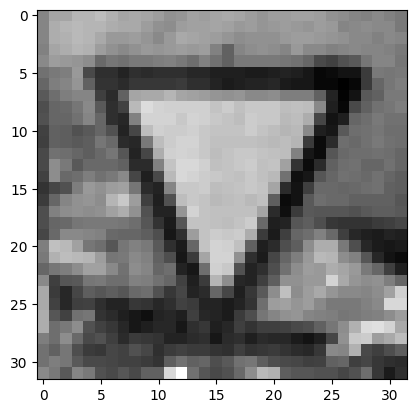

In [13]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

# BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [14]:
from tensorflow import keras
from keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6,(5,5),activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

# 0.2: This parameter represents the dropout rate, which is the fraction of input units to drop during training. In this case, 0.2 means that 20% of the input units will be 
#randomly set to zero during each training iteration. The value of the dropout rate is typically chosen through experimentation and tuning.

CNN.add(layers.Dropout(0.2))  


CNN.add(layers.Conv2D(16,(5,5),activation = 'relu'))
CNN.add(layers.AveragePooling2D())


CNN.add(layers.Flatten())  # to give input to the fully connected layers
 

CNN.add(layers.Dense(120,activation = 'relu'))
CNN.add(layers.Dense(84,activation = 'relu'))
CNN.add(layers.Dense(43,activation = 'softmax'))

CNN.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0

# COMPILE AND TRAIN DEEP CNN MODEL

In [15]:
CNN.compile(optimizer= 'Adam',loss ='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [16]:
X_train_gray_norm.shape


(34799, 32, 32, 1)

In [17]:
history = CNN.fit(X_train_gray_norm,
                  y_train,
                  batch_size=500,
                  epochs= 25,
                  verbose=1,
                  validation_data=(X_validation_gray_norm,y_validation
                  ))
#n the context of machine learning libraries like TensorFlow and Keras, 
#"verbose" is an optional argument that controls the amount of information printed during the training process

Epoch 1/25
70/70 [==============================] - 6s 75ms/step - loss: 3.2045 - accuracy: 0.1675 - val_loss: 2.8598 - val_accuracy: 0.2605
Epoch 2/25
70/70 [==============================] - 5s 69ms/step - loss: 2.0417 - accuracy: 0.4425 - val_loss: 1.7710 - val_accuracy: 0.5045
Epoch 3/25
70/70 [==============================] - 5s 69ms/step - loss: 1.3778 - accuracy: 0.6036 - val_loss: 1.1738 - val_accuracy: 0.6617
Epoch 4/25
70/70 [==============================] - 5s 68ms/step - loss: 0.9636 - accuracy: 0.7201 - val_loss: 0.9172 - val_accuracy: 0.7367
Epoch 5/25
70/70 [==============================] - 5s 68ms/step - loss: 0.7610 - accuracy: 0.7791 - val_loss: 0.7927 - val_accuracy: 0.7723
Epoch 6/25
70/70 [==============================] - 5s 67ms/step - loss: 0.6390 - accuracy: 0.8150 - val_loss: 0.7020 - val_accuracy: 0.8050
Epoch 7/25
70/70 [==============================] - 5s 66ms/step - loss: 0.5328 - accuracy: 0.8438 - val_loss: 0.6465 - val_accuracy: 0.8304
Epoch 8/25
70

# ASSESS TRAINED CNN MODEL PERFORMANCE 

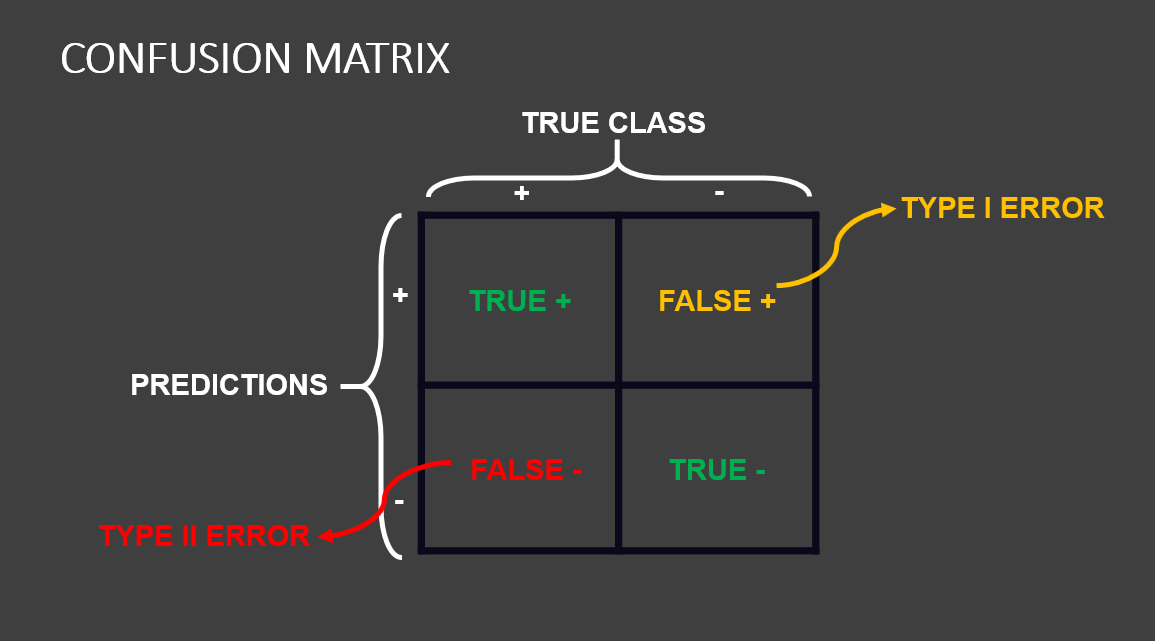

In [18]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 2ms/step - loss: 0.7396 - accuracy: 0.8703
Test Accuracy: 0.8703088164329529


In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

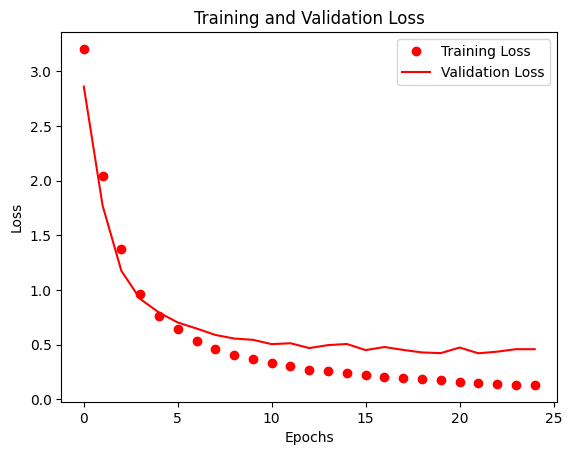

In [21]:
epochs = range(len(accuracy))
plt.plot(epochs, loss, 'ro', label='Training Loss')  # Plot training loss with red circles
plt.plot(epochs, val_loss, 'r', label='Validation Loss')  # Plot validation loss with red line
plt.title('Training and Validation Loss')  # Set the title for the plot
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Loss')  # Label for y-axis
plt.legend()  # Show legend indicating what each line represents
plt.show()  # Display the plot


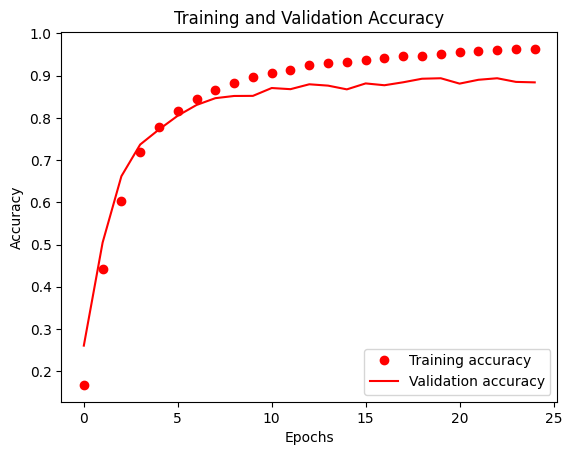

In [22]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'ro', label='Training accuracy')  # Plot training loss with red circles
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')  # Plot validation loss with red line
plt.title('Training and Validation Accuracy')  # Set the title for the plot
plt.xlabel('Epochs')  # Label for x-axis
plt.ylabel('Accuracy')  # Label for y-axis
plt.legend()  # Show legend indicating what each line represents
plt.show()  # Display the plot


In [23]:
X_test_gray_norm.shape

(12630, 32, 32, 1)

395/395 [==============================] - 1s 2ms/step


<Axes: >

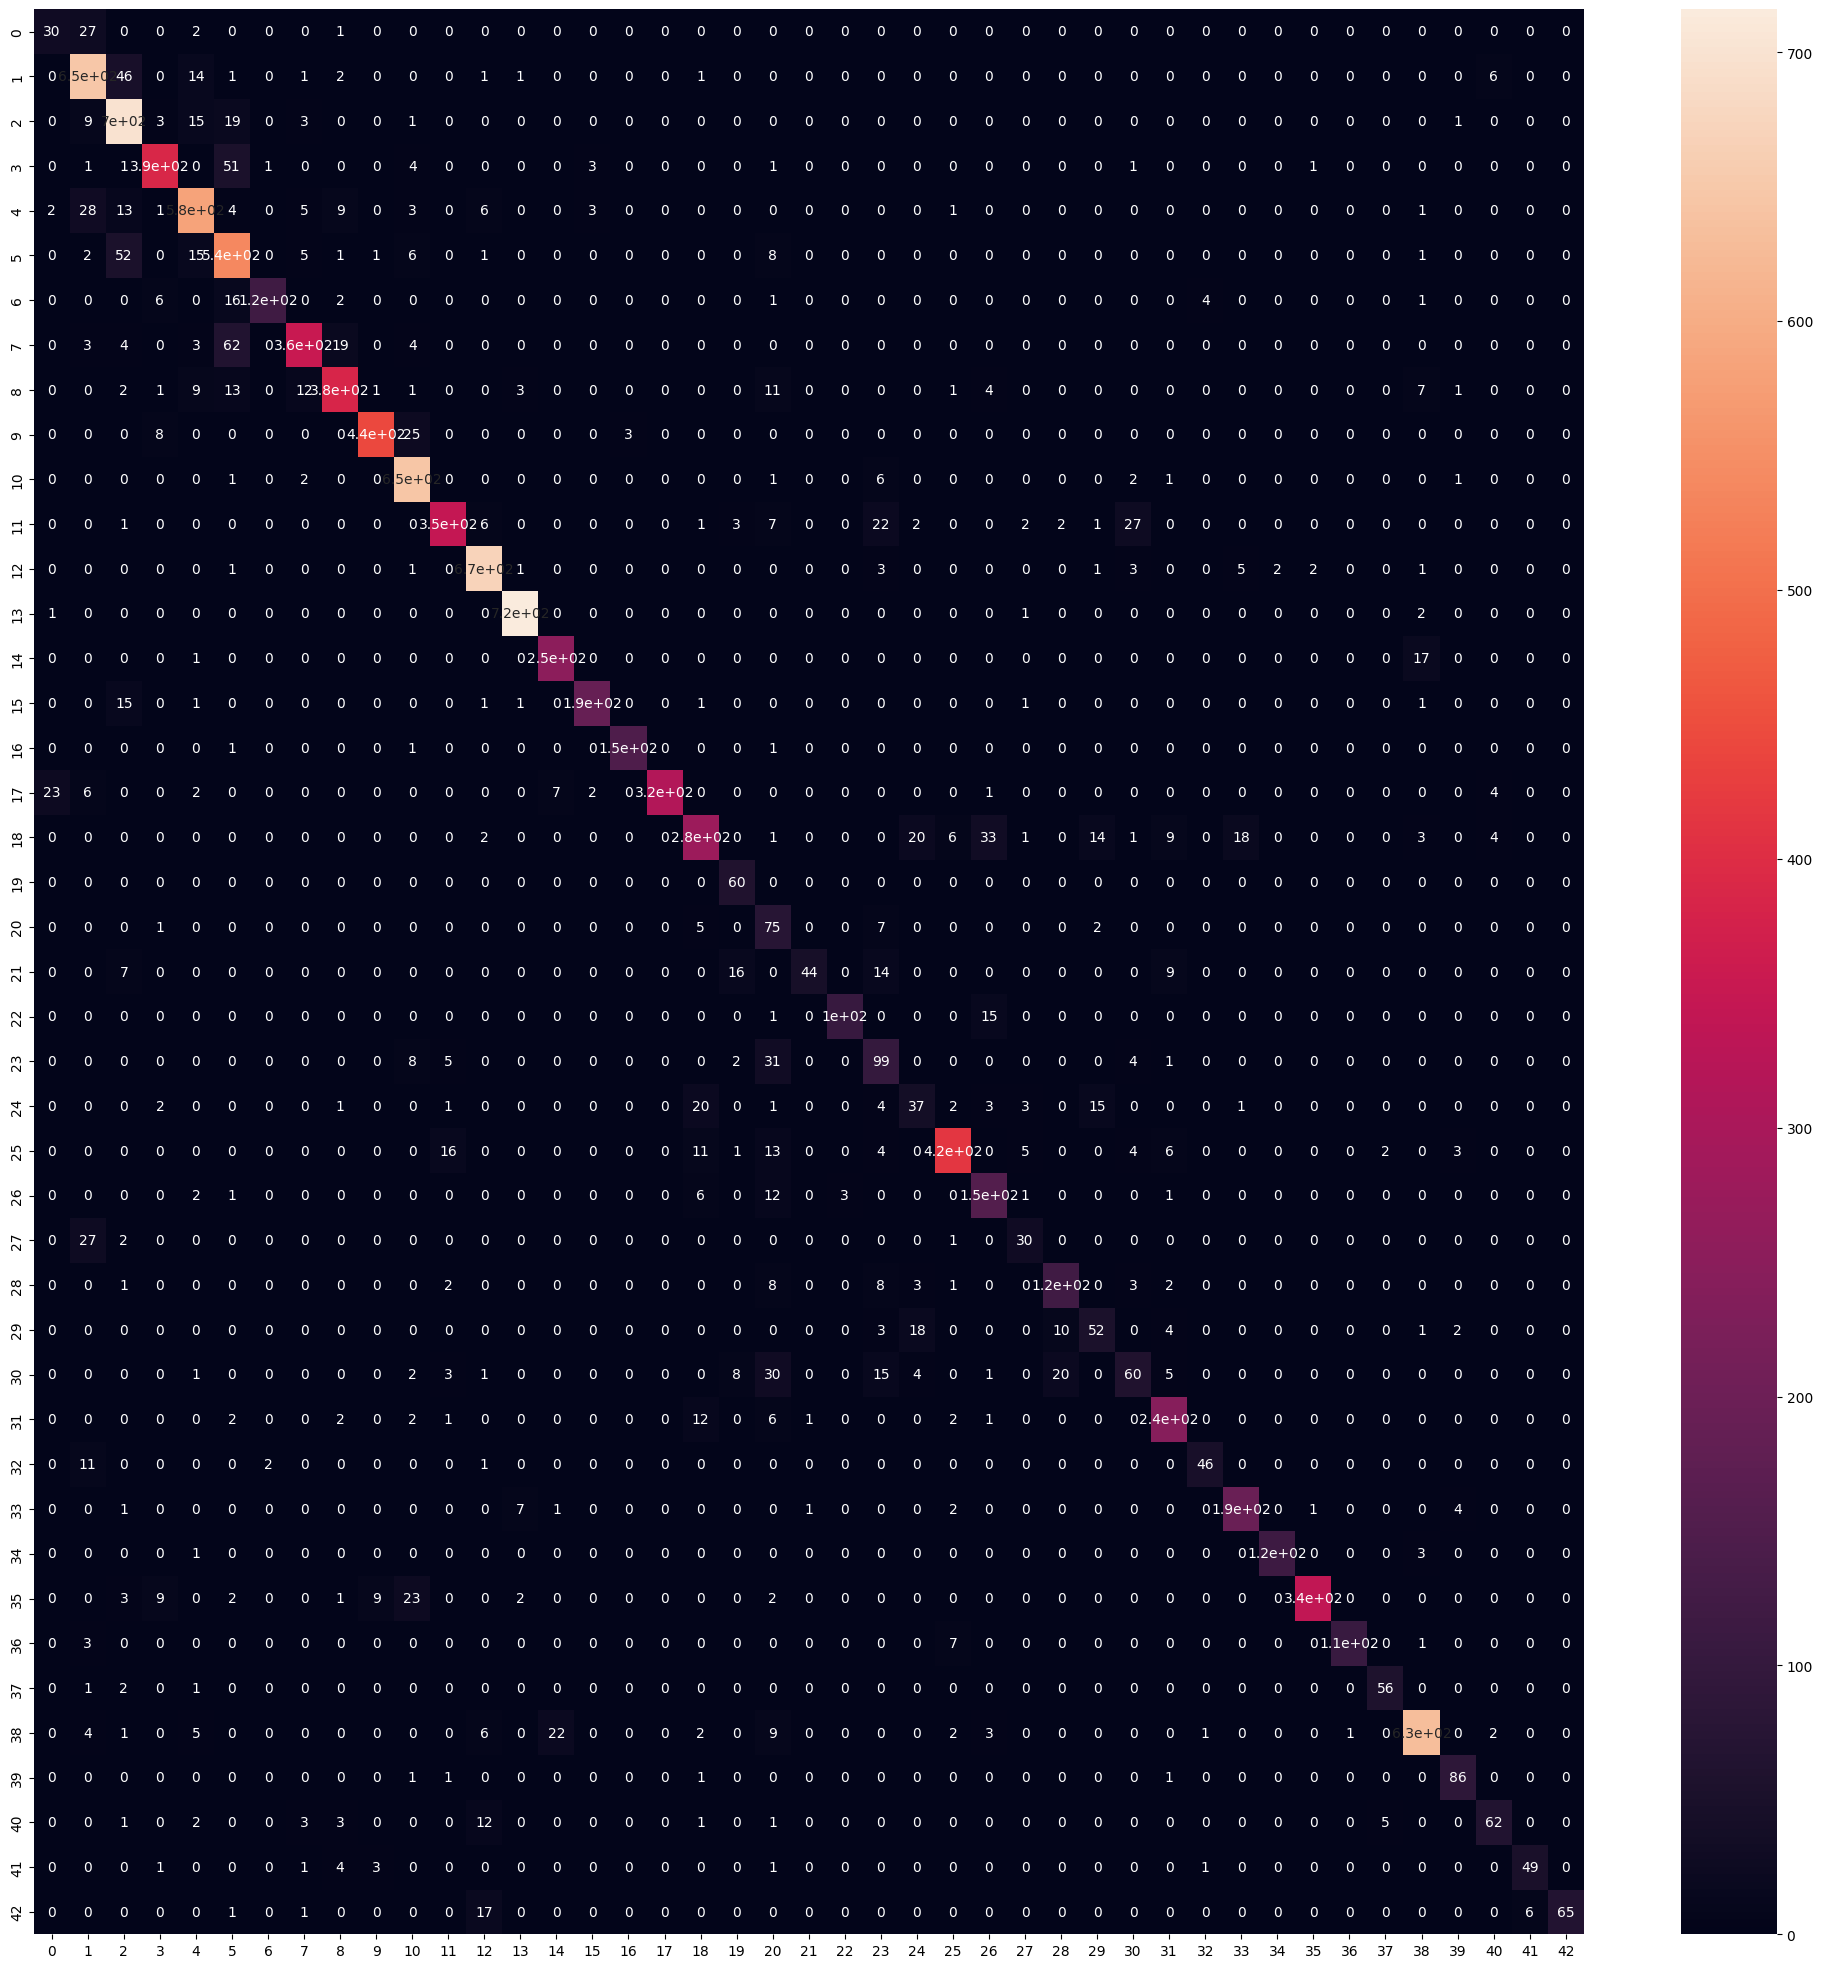

In [24]:
from sklearn.metrics import confusion_matrix

# Get predicted probabilities for each class
predicted_probabilities = CNN.predict(X_test_gray_norm)

# Convert predicted probabilities to predicted classes
predicted_classes = np.argmax(predicted_probabilities, axis=1)

# y_true remains the same
y_true = y_test

# Calculate confusion matrix
cm = confusion_matrix(y_true, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(25, 25))
sns.heatmap(cm, annot=True)


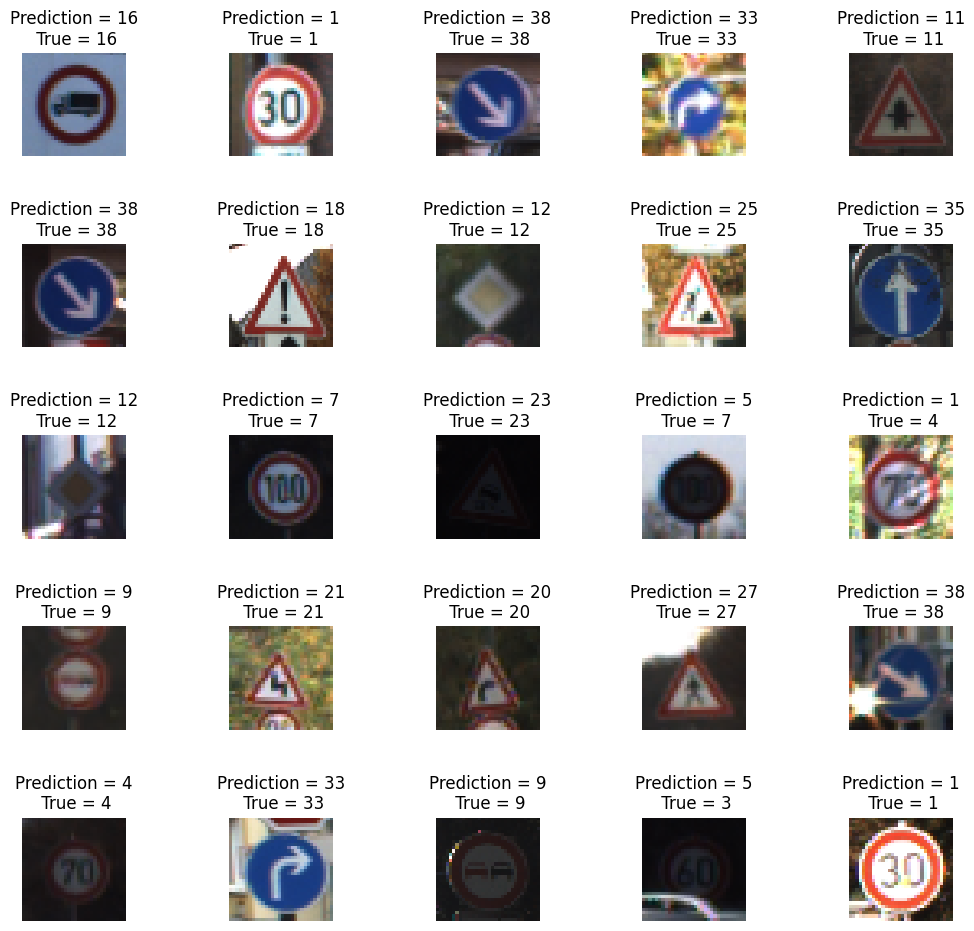

In [25]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

In [27]:
import os

# Get current working directory
current_directory = os.getcwd()
print("Current directory:", current_directory)


Current directory: c:\Users\Administrator\Desktop\Python\Road Sign Classification


In [28]:
import os
import tensorflow as tf

# Get current working directory
current_directory = os.getcwd()

# Define the path where you want to save the model
save_path = os.path.join(current_directory, "pets", "model")

# Verify the save path
print("Save path:", save_path)

# Assuming CNN is your trained model
# Save the model
tf.saved_model.save(CNN, save_path)


Save path: c:\Users\Administrator\Desktop\Python\Road Sign Classification\pets\model
INFO:tensorflow:Assets written to: c:\Users\Administrator\Desktop\Python\Road Sign Classification\pets\model\assets


INFO:tensorflow:Assets written to: c:\Users\Administrator\Desktop\Python\Road Sign Classification\pets\model\assets


# APPENDIX


- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons
